## 1. Packages

In [1]:
using Random
using Plots

## 2. Bayesian update 



In [ ]:
function bayes_step(
    prob_true::Float64,
    true_hypothesis::Bool,
    power::Float64,
    false_positive_rate::Float64,
)
    if true_hypothesis
        # Hypothesis is actually true
        if rand() < power
            # true positive
            prob_true = (power * prob_true) /
                        ((power * prob_true) + (false_positive_rate * (1 - prob_true)))
        else
            # false negative
            prob_true = ((1 - power) * prob_true) /
                        (((1 - power) * prob_true) + ((1 - false_positive_rate) * (1 - prob_true)))
        end
    else
        # Hypothesis is actually false
        if rand() < false_positive_rate
            # false positive
            prob_true = (power * prob_true) /
                        ((power * prob_true) + (false_positive_rate * (1 - prob_true)))
        else
            # true negative
            prob_true = ((1 - power) * prob_true) /
                        (((1 - power) * prob_true) + ((1 - false_positive_rate) * (1 - prob_true)))
        end
    end

    return prob_true
end


bayes_step (generic function with 1 method)

## 3. Helper - running simulation


In [3]:

function run_timeseries(
    initial_prior::Float64,
    true_hypothesis::Bool,
    power::Float64,
    false_positive_rate::Float64,
    n_steps::Int,
)
    prob_true = initial_prior
    data = Float64[]
    push!(data, prob_true)  # time 0

    for _ in 1:n_steps
        prob_true = bayes_step(prob_true, true_hypothesis, power, false_positive_rate)
        push!(data, prob_true)
    end

    return data
end

run_timeseries (generic function with 1 method)

## 4. Parameters, simulate, and plot



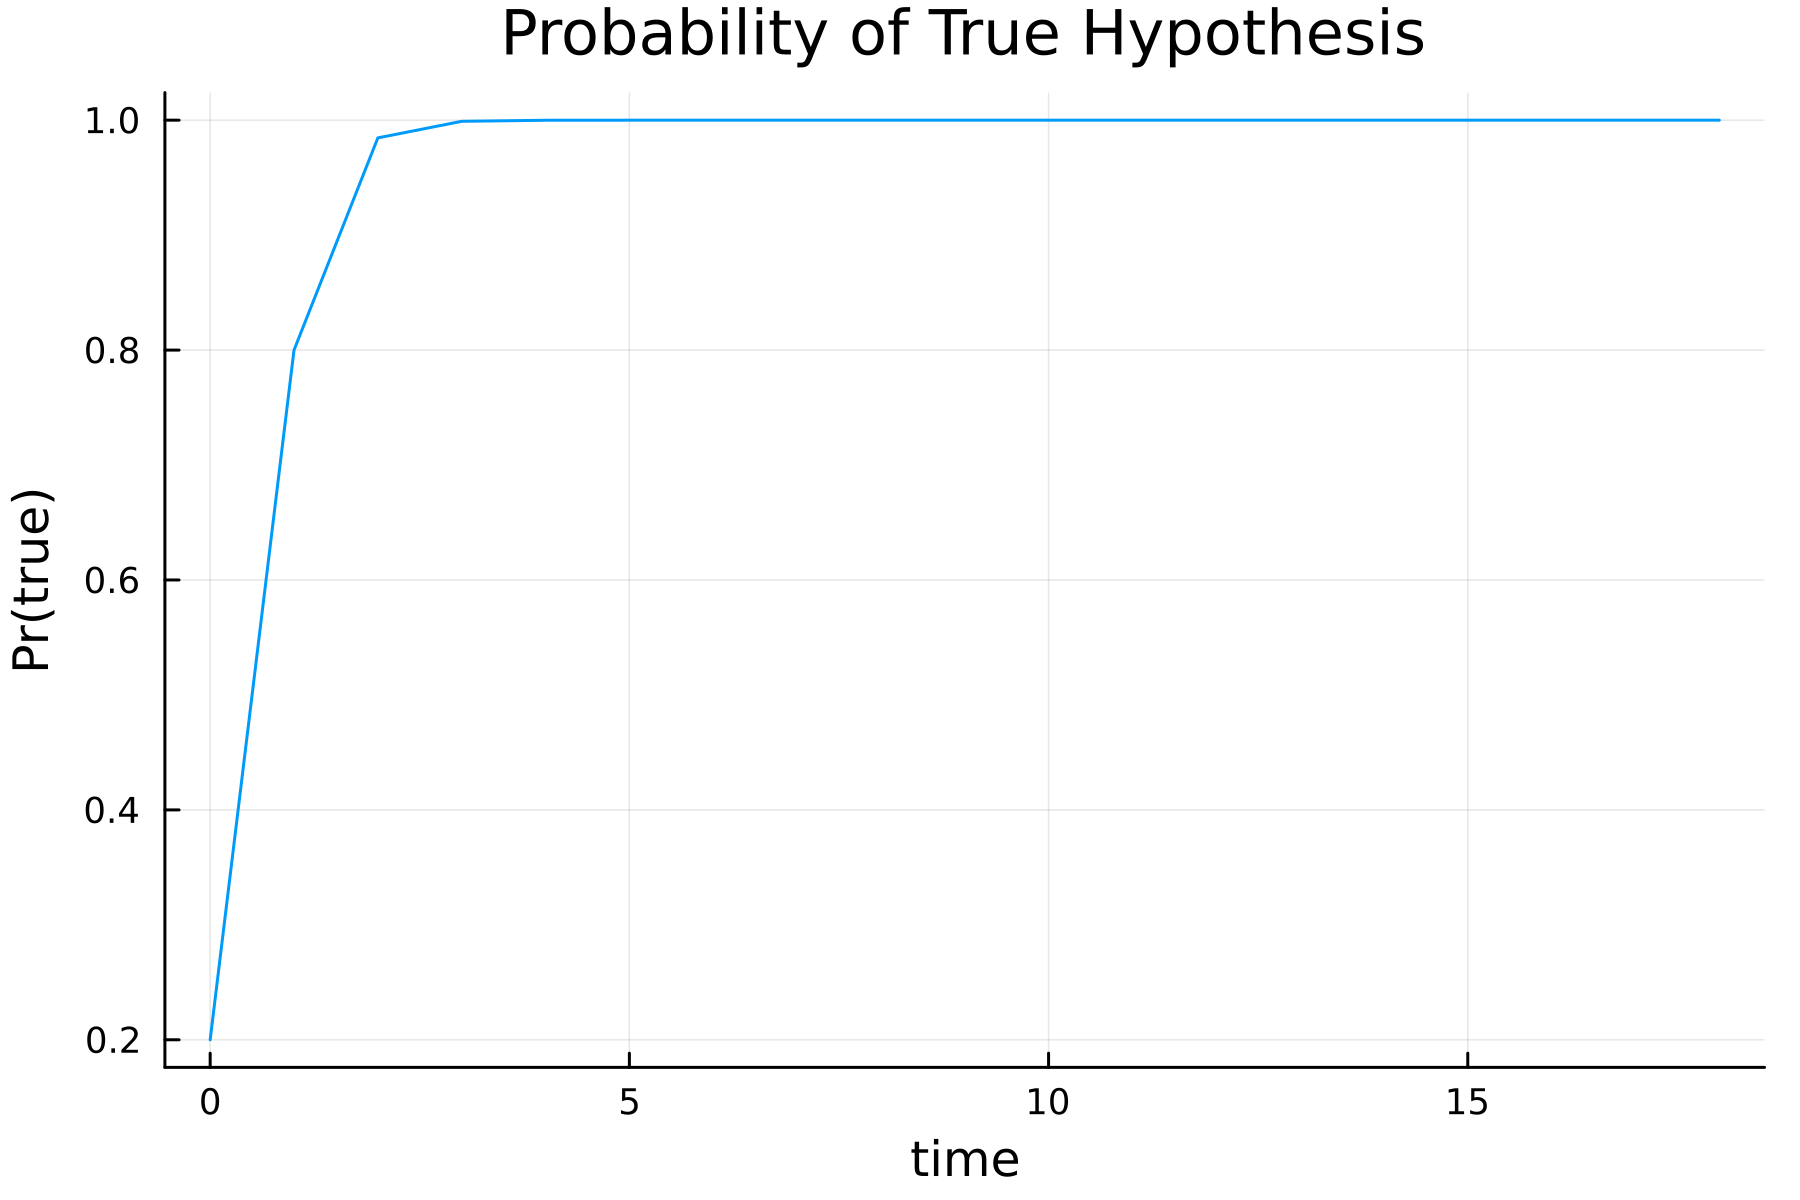

In [ ]:

initial_prior = 0.2   # adjust as needed
true_hypothesis = true  # adjust as needed
power = 0.8   # adjust as needed
false_positive_rate = 0.05 # adjust as needed
n_steps = 18    # adjust as needed

# Run the simulation
data = run_timeseries(initial_prior, true_hypothesis,
    power, false_positive_rate, n_steps)

# Time
times = 0:n_steps

# Make the plot
plt = plot(
    times,
    data,
    title="Probability of True Hypothesis",
    xlabel="time",
    ylabel="Pr(true)",
    legend=false,
    dpi=300,
)

display(plt)